In [18]:
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras import layers
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)  # 단어를 10000개로 제한
# data는 학습데이터, labels는 부정과 긍정을 나타내는 1의 리스트.
# 여러 단어로 구성된 리뷰 data[0]는 labels[0]=1과 매칭됨


def vectorize_sequences(sequences, dimension=10000):   # 멀티-핫 인코딩 시키는 함수. num_words가 10000개로 제한됐기 때문에
    results = np.zeros((len(sequences), dimension))    # 10000차원의 영벡터를 생성
    for i, sequence in enumerate(sequences):          # 리뷰 하나하나를 순회하며 인덱스와 값을 반환받아
        for j in sequence:                            # 리뷰 하나의 모든 원소값에 대해
            results[i, j] = 1.                         #  results[0, 원소값]에 1을 저장함
    
    return results                                    # 인코딩시킨 results 반환


x_train = vectorize_sequences(train_data)              # 데이터들을 인코딩시킴
x_test = vectorize_sequences(test_data)


y_train = np.asarray(train_labels).astype("float32")   # 레이블을 벡터로 변환시키는 법. 레이블은 간단함
y_test = np.asarray(test_labels).astype("float32")


model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
             loss="binary_crossentropy",
             metrics=["accuracy"])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


history = model.fit(partial_x_train, partial_y_train, epochs=20, 
                    batch_size=512, validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()
[u'acc', u'loss', u'val_acc', u'val_loss']
list(history_dict.keys())[0]
acc = history_dict['accuracy']

Epoch 1/20
30/30 [==============================] - 3s 93ms/step - loss: 0.5236 - accuracy: 0.7931 - val_loss: 0.4171 - val_accuracy: 0.8640
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3568 - accuracy: 0.8899 - val_loss: 0.3484 - val_accuracy: 0.8757
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2838 - accuracy: 0.9093 - val_loss: 0.3269 - val_accuracy: 0.8720
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2406 - accuracy: 0.9229 - val_loss: 0.3044 - val_accuracy: 0.8803
Epoch 5/20
30/30 [==============================] - 2s 71ms/step - loss: 0.2100 - accuracy: 0.9330 - val_loss: 0.2795 - val_accuracy: 0.8887
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1865 - accuracy: 0.9414 - val_loss: 0.2780 - val_accuracy: 0.8870
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1692 - accuracy: 0.9469 - val_loss: 0.2744 - val_accuracy: 0.8867
Epoch 8/20
30

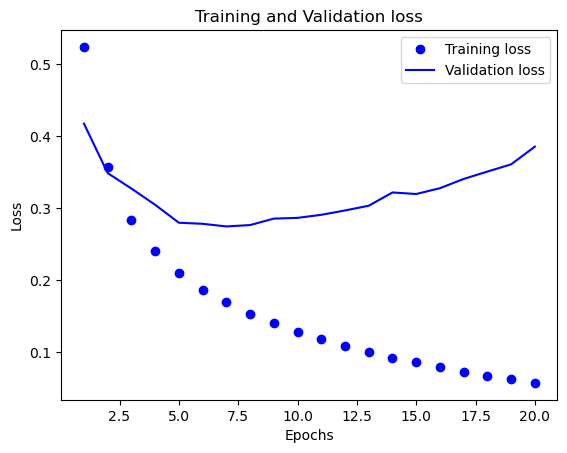

In [19]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

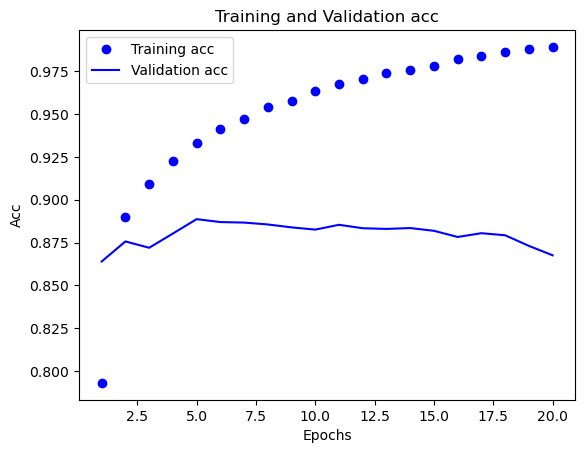

In [20]:
plt.clf()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()